# Data Processing

Load data.

In [0]:
import os
import re
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd

In [0]:
# Local path
data_base_path = "./"

In [0]:


from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# Data's path
data_base_path = '/gdrive/My Drive/cs3793/'
# Alexander's path
#data_base_path = '/gdrive/My Drive/School/CS 3793/'

In [0]:
# data_path defined in (only) one of the code cells above.
data_file_name = data_base_path + "NLP-classification-training-data.csv"
data_file = pd.read_csv(
    data_file_name,
    error_bad_lines=False,
    encoding="latin-1",
    header=None,
    names=['sentiment', 'id', 'timestamp', 'query', 'user', 'tweet'],
    usecols=['sentiment', 'tweet']
)

data_file.head()

print( '# samples: ', len(data_file.index) )

# samples:  251197


Here you can see some of the original tweets



In [0]:
for i in range(0,15):
  print(data_file['tweet'].values[i])

Need a hug 
@octolinz16 It it counts, idk why I did either. you never talk to me anymore 
@FakerPattyPattz Oh dear. Were you drinking out of the forgotten table drinks? 
Just going to cry myself to sleep after watching Marley and Me.  
thought sleeping in was an option tomorrow but realizing that it now is not. evaluations in the morning and work in the afternoon! 
@fleurylis I don't either. Its depressing. I don't think I even want to know about the kids in suitcases. 
@Viennah Yay! I'm happy for you with your job! But that also means less time for me and you... 
our duck and chicken are taking wayyy too long to hatch 
Where did u move to?  I thought u were already in sd. ?? Hmmm. Random u found me. Glad to hear yer doing well.
@Starrbby too bad I won't be around I lost my job and can't even pay my phone bill lmao aw shucks 
@ninjen I'm sure you're right...    I need to start working out with you and the Nikster... Or Jared at least!
No new csi tonight.  FML
@markhardy1974 Me too  #it

Clean data: used regex to remove @ references, links, and hashtags as well as punctuation. Also mapped words with more than two repeating letters to juwt two letters to reduce the  size of the vocabulary

In [0]:
def preprocess():
    data = data_file.copy()
    tweets = data['tweet']
    tweets = tweets.str.replace(r"@([A-Za-z_0-9]*)", r"")
    tweets = tweets.str.replace(r"#([A-Za-z_0-9]*)", r"")
    tweets = tweets.str.replace(r"http:\S+", r"")
    tweets = tweets.str.replace(r"([!\.,:?\"\'\(\);])", r"")
    tweets = tweets.str.replace(r"([A-Za-z])\1{2,}", r"\1\1")
    tweets = tweets.str.lower()
    data['tweet'] = tweets

    data['sentiment'] = data['sentiment'].replace(4, 1)

    return data

data = preprocess()

Split into train and dev sets

In [0]:
from sklearn.model_selection import train_test_split

tweets = data['tweet'].values
sentiments = data['sentiment'].values

training_tweets, testing_tweets, training_labels, testing_labels = train_test_split(tweets, sentiments, test_size=0.10)

You can look at the cleaned testing tweets here. This does not fix mispellings

In [0]:
for i in range(0, 15):
    print(tweets[i])

need a hug 
 it it counts idk why i did either you never talk to me anymore 
 oh dear were you drinking out of the forgotten table drinks 
just going to cry myself to sleep after watching marley and me  
thought sleeping in was an option tomorrow but realizing that it now is not evaluations in the morning and work in the afternoon 
 i dont either its depressing i dont think i even want to know about the kids in suitcases 
 yay im happy for you with your job but that also means less time for me and you 
our duck and chicken are taking wayy too long to hatch 
where did u move to  i thought u were already in sd  hmm random u found me glad to hear yer doing well
 too bad i wont be around i lost my job and cant even pay my phone bill lmao aw shucks 
 im sure youre right    i need to start working out with you and the nikster or jared at least
no new csi tonight  fml
 me too  
 sorry babe  my fam annoys me too thankfully theyre asleep right now muahaha *evil laugh*
so ryleegracewana go steve

This removes the least frequent words (which are mostly misspellings) and converts each sentence to an vector of all even length

In [0]:
####USE THIS FOR RNN MODELS####
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

NUM_WORDS = 8000
PADDING = 320

t = Tokenizer(num_words=NUM_WORDS)
t.fit_on_texts(training_tweets)
X= t.texts_to_sequences(training_tweets)
X_test=t.texts_to_sequences(testing_tweets)
X = sequence.pad_sequences(X, maxlen=PADDING)
X_test = sequence.pad_sequences(X_test, maxlen=PADDING)
print(X[:15])
print(type(X))

[[   0    0    0 ...    6 1564 1786]
 [   0    0    0 ...    2 1431   52]
 [   0    0    0 ...    2   50   88]
 ...
 [   0    0    0 ...   10    3  246]
 [   0    0    0 ...   85 3567 2685]
 [   0    0    0 ... 2209    4  792]]
<class 'numpy.ndarray'>


In [0]:
print(X_test.shape)

(25120, 320)


View Data: This bar chart shows the number of positive and negative tweets for our training and dev sets

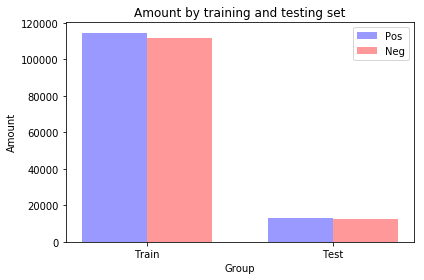

In [0]:
from matplotlib import pyplot as plt

def get_num_pos_neg(Y):
  num_pos = 0
  num_neg = 0
  for y in Y:
    if y == 1:
      num_pos += 1
    else:
      num_neg += 1
  return(num_pos, num_neg)

(num_train_pos, num_train_neg) = get_num_pos_neg(training_labels)

(num_test_pos, num_test_neg) = get_num_pos_neg(testing_labels)

n_groups = 2

means_pos = (num_train_pos, num_test_pos)
std_pos = (3,5)

means_neg = (num_train_neg, num_test_neg)
std_neg = (3, 5)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_pos, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Pos')

rects2 = ax.bar(index + bar_width, means_neg, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='Neg')

ax.set_xlabel('Group')
ax.set_ylabel('Amount')
ax.set_title('Amount by training and testing set')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Train', 'Test'))
ax.legend()

fig.tight_layout()
plt.show()

# Model creation

We used an RNN to leverage it's ability to remeber previouse input. We also experimented with two other models, but the RNN was slightly better 

In [0]:
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding, SimpleRNN, LSTM, SpatialDropout1D

target = training_labels


X_train = X
X_val = X_test
y_train = training_labels
y_val  = testing_labels
#X_train, X_val, y_train, y_val = train_test_split(
#    X, target, train_size = 0.9
#)
model = Sequential()
epochs = 2
embedding_size= 32
input_dim = X_train.shape[1]


#RNN model
model.add(Embedding(NUM_WORDS, embedding_size, input_length=PADDING))
model.add(SimpleRNN(embedding_size, return_sequences=True, dropout=.25))
model.add(SimpleRNN(embedding_size, return_sequences=True, dropout=.2))
model.add(SimpleRNN(embedding_size, return_sequences=True, dropout=.1))
model.add(SimpleRNN(embedding_size, dropout=.05))
model.add(layers.Dense(1, activation='sigmoid'))

#RNN w/ LSTM (1 epoch takes about 20min)
#model.add(Embedding(10000, embedding_size, input_length=280))
#model.add(LSTM(100))
#model.add(layers.Dense(1, activation='sigmoid'))

#DNN model
#model.add(layers.Dense(12, input_dim = input_dim, activation='relu'))
#model.add(layers.Dense(8, activation='relu'))
#model.add(layers.Dense(4, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 320, 32)           256000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 320, 32)           2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 320, 32)           2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 320, 32)           2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 264,353
Trainable params: 264,353
Non-trainable params: 0
_________________________________________________________________


We train the model with just two epochs because it starts to overfit after that.

In [0]:
epochs = 2
history = model.fit(X_train, y_train,
                     epochs=epochs,
                     verbose=True,
                     validation_data=(X_test, testing_labels),
                     batch_size=256)

Train on 226077 samples, validate on 25120 samples
Epoch 1/2
225024/226077 [============================>.] - ETA: 1s - loss: 0.5265 - acc: 0.7263

KeyboardInterrupt: ignored

save model

In [0]:
!pip install h5py pyyaml

In [0]:
model.save('to_be_determinded_model.h5')

# Evaluation

This is the loss and accuracy of our model

In [0]:
score = model.evaluate(X_val,y_val)
print('test loss:',score[0])
print('test accuracy:',score[1])

25120/25120 [==============================] - 36s 1ms/step
test loss: 0.4562808262124942
test accuracy: 0.7866242038216561


Get predictions

In [0]:
y_pred = model.predict(X_val)
for i in range(0, len(y_pred)):
  y_pred[i] = int(y_pred[i] > .5) 
print(y_pred)


[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


Here you can see a sample of the tweets that we classified incorrectly

In [0]:
def find_mistake_indeces(X, Y):
  ret = list()
  for i in range(0, len(X)):
    #print(str(X[i][0])+ "  "+ str(Y[i]))
    if(X[i][0] != Y[i]):
      #print(str(X[i][0])+ "  "+ str(Y[i]))
      ret.append(i)
  
  return ret

mistake_indeces = find_mistake_indeces(y_pred, testing_labels)
for i in range(0, 20:
  print(testing_tweets[mistake_indeces[i]] + "  "+ str(y_pred[mistake_indeces[i]][0]) + "  " + str(testing_labels[mistake_indeces[i]]))
  
#print(y_pred.shape)
#print(testing_labels.shape)

 they wouldnt let me bring mine to the apartmentno pets here   1.0  0
 to procurando internacionais   0.0  1
 sorry about your visuals being irritated   0.0  1
who wants to come over for dinner   0.0  1
i am on mcrime chat room by myself  come say hi   1.0  0
have u people ever fallen in love wiv the wrong person   1.0  0
  think i might leave the automated phone stuff for another day   0.0  1
- going to blog because her emotions are getting the best of her   1.0  0
 cheers dude need to wait for the exam results though  just glad to get them out the way 2 more weeks then its summer  1.0  0
looking for a job like the other millions of people in this nation   1.0  0
i think im gonna ride my bike for like an hour tomorrow   1.0  0
 well you were much missed my friend   0.0  1
thanks for the comments on my new twitter page  trying not to take things too seriously    0.0  1
started messing with path finder for mac not really sure what i think of it i will continue my work with it tomorrow  

This is the plot of our ROC curve

In [0]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

NameError: ignored

Our confusion matrix

In [0]:
matrix = metrics.confusion_matrix(y_val, y_pred)
print(matrix)

TP = matrix[1, 1]
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]

[[8640 2467]
 [2253 9248]]


This is the breakdown of the precision and recall of our model

In [0]:
from sklearn.metrics import classification_report

target_names = ['Positive Tweets', 'Negative Tweets']
print(classification_report(y_val, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Positive Tweets       0.76      0.82      0.79     11151
Negative Tweets       0.81      0.75      0.78     11457

      micro avg       0.78      0.78      0.78     22608
      macro avg       0.78      0.78      0.78     22608
   weighted avg       0.78      0.78      0.78     22608

